In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [251]:
def load_picke(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

carla_stats = load_picke('./stats/carla_dict.pkl')
carla_statsv1 = load_picke('./stats/carla_v1_dict.pkl')
comma_stats = load_picke('./stats/comma2k19_dict.pkl')


In [75]:
for key in carla_stats:
    print(len(carla_stats[key]))

328000
328000
328000


In [252]:
for key in carla_statsv1:
    print(key)
    print(len(carla_statsv1[key]))

speeds
328000
curvatures
328000
yaws
328000


In [76]:

for key in comma_stats:
    print(key)
    print(len(carla_stats[key]))

speeds
328000
curvatures
328000
yaws
328000


In [77]:
arr = np.array(carla_stats["curvatures"])
arr[np.isinf(arr)]

array([inf, inf, inf, ..., inf, inf, inf])

In [305]:
from matplotlib.pyplot import yscale


zero_tol_dict = {
    "speeds": 1,
    "curvatures": 0.001,
    "yaws": np.pi/128,
}
bins = {
    "speeds": 50, #[0] + [zero_tol_dict["speeds"]] + list(range(1, 51)),
    "curvatures": [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 1e100],
    "yaws": [-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, -np.pi/8, -np.pi/16, -np.pi/32, -np.pi/64, -np.pi/128, np.pi/128, np.pi/64, np.pi/32, np.pi/16, np.pi/8, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
     # "yaws": [-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, -np.pi/8, -np.pi/16, -np.pi/32, -np.pi/64, np.pi/64, np.pi/32, np.pi/16, np.pi/8, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]

}

_yaws_string = ["-π", "-3π/4", "-π/2", "-π/4", "-π/8", "-π/16", "-π/32", "-π/64", "-π/128", "π/128", "π/64", "π/32", "π/16", "π/8", "π/4", "π/2", "3π/4", "π"]
# _yaws_string = ["-π", "-3π/4", "-π/2", "-π/4", "-π/8", "-π/16", "-π/32", "π/32", "π/16", "π/8", "π/4", "π/2", "3π/4", "π"]
# _yaws_string = ["-π", "-3π/4", "-π/2", "-π/4", "-π/8", "-π/16", "-π/32", "-π/64", "π/64", "π/32", "π/16", "π/8", "π/4", "π/2", "3π/4", "π"]
yaws_strings = [f"({item1},{item2}]" for item1, item2 in zip(_yaws_string[:-1], _yaws_string[1:])]
print(yaws_strings)

def add_text(ax, values2, zero_tol=0.001):
    minimum = np.min(values2)
    ax.text(0.98, 0.9, f"Mean: {np.mean(values2):.3f}", horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.98, 0.8, f"Median: {np.median(values2):.3f}", horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.98, 0.7, f"Min: {minimum:.3f}", horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.98, 0.6, f"Max: {np.max(values2):.3f}", horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.98, 0.5, f"Std: {np.std(values2):.3f}", horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.98, 0.4, f"Near zero count: {np.count_nonzero(np.isclose(values2, 0, atol=zero_tol))}", horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)


def add_text_yaws(ax, values2, zero_tol=0.001):
    minimum = np.min(values2)
    mean = np.mean(values2)
    # right = values2[values2 > (0 + zero_tol)]
    # left = values2[values2 < (0 - zero_tol)]
    nonzero = values2[np.abs(values2) > zero_tol]
    ax.text(0.98, 0.9, f"Mean: {mean:.3f}", horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.98, 0.8, f"Mean abs nonzero: {np.mean(np.abs(nonzero)):.3f}", horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.98, 0.7, f"Median: {np.median(values2):.3f}", horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.98, 0.6, f"Median abs nonzero: {np.median(np.abs(nonzero)):.3f}", horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.98, 0.5, f"Near zero count: {np.count_nonzero(np.isclose(values2, 0, atol=zero_tol))}", horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.98, 0.4, f"Std: {np.std(values2):.3f}", horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)

def filter_values(value: np.ndarray):
    value = value.copy()
    return value
    avg = np.mean(val)
    std = np.std(val)
    return val[(val > avg - 2 * std) & (val < avg + 2 * std)]

def plot_speeds(ax, values: np.ndarray):
    print("speeds bins", bins["speeds"])
    # df = pd.DataFrame(values)
    # df["group"] = pd.cut(df[0], bins=bins["speeds"])
    # count = df["group"].value_counts().sort_index()#.reset_index()
    # count.plot(kind='bar',  ylim=(0, 100000), ax=ax)
    ax.hist(values, bins=bins["speeds"])
    ax.set_ylim(0, 100000)


def plot_curvature(ax, values: np.ndarray):
    values = values.copy()
    values[np.isinf(values)] = 0
    df = pd.DataFrame(values)
    df["group"] = pd.cut(df[0], bins=bins["curvatures"])
    count = df["group"].value_counts().sort_index()#.reset_index()
    count.plot(kind='bar',  ylim=(0, 200000), ax=ax, width=1)
    

def plot_yaw(ax, values: np.ndarray):
    df = pd.DataFrame(values)
    df["group"] = pd.cut(df[0], bins=bins["yaws"])
    count = df["group"].value_counts().sort_index()#.reset_index()
    count.index = yaws_strings
    count.plot(kind="bar", logy=True, ylim=(0, 10**6), ax=ax, width=1)

def plot_stats(dic1, dic2):
    for key in dic1:
        values1 = filter_values(np.array(dic1[key]))
        values2 = filter_values(np.array(dic2[key]))
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 5)
        title = key if key != "yaws" else "yaw rates"
        fig.suptitle(title)
        if key == "curvatures":
            # ax1.hist(values1)
            # ax1.set_xscale('log')
            # ax1.set_yscale("log")
            # ax2.hist(values2)
            # ax2.set_xscale('log')
            # ax2.set_yscale("log")
            values1[np.isinf(values1)] = 0
            values2[np.isinf(values2)] = 0
            plot_curvature(ax1, values1)
            plot_curvature(ax2, values2)
        elif key == "yaws":
            # values1 = np.pi/2 - values1
            # values2 = np.pi/2 - values2
            plot_yaw(ax1, values1)
            plot_yaw(ax2, values2)
        elif key == "speeds":
            plot_speeds(ax1, values1)
            plot_speeds(ax2, values2)
        else:
            ax1.hist(values1, label=key, bins=bins[key])
            ax2.hist(values2, label=key, bins=bins[key])
        ax1.title.set_text("CARLA")
        ax2.title.set_text("comma2k19")
        if key == "yaws":
            add_text_yaws(ax1, values1, zero_tol=zero_tol_dict[key])
            add_text_yaws(ax2, values2, zero_tol=zero_tol_dict[key])
        else:
            add_text(ax1, values1, zero_tol=zero_tol_dict[key])
            add_text(ax2, values2, zero_tol=zero_tol_dict[key])

        plt.show()
    
    
def plot_stats_single(dic1, title: str):

    for key in dic1:
        values1 = filter_values(np.array(dic1[key]))
        fig, (ax1) = plt.subplots(1, 1)
        fig.set_size_inches(9, 6)
        ax_title = key if key != "yaws" else "yaw rates"
        ax1.title.set_text(ax_title)
        if key == "curvatures":
            values1[np.isinf(values1)] = 0
            plot_curvature(ax1, values1)
        elif key == "yaws":
            # values1 = np.pi/2 - values1
            plot_yaw(ax1, values1)
        elif key == "speeds":
            plot_speeds(ax1, values1)
        else:
            ax1.hist(values1, label=key, bins=bins[key])
        if key == "yaws":
            add_text_yaws(ax1, values1, zero_tol=zero_tol_dict[key])
        else:
            add_text(ax1, values1, zero_tol=zero_tol_dict[key])
        fig.suptitle(title)

        plt.show()
        name = "_".join(ax_title.lower().split()) +"_" +  "_".join(title.lower().split())
        print("name", name)
        fig.savefig(name, bbox_inches='tight')
    

['(-π,-3π/4]', '(-3π/4,-π/2]', '(-π/2,-π/4]', '(-π/4,-π/8]', '(-π/8,-π/16]', '(-π/16,-π/32]', '(-π/32,-π/64]', '(-π/64,-π/128]', '(-π/128,π/128]', '(π/128,π/64]', '(π/64,π/32]', '(π/32,π/16]', '(π/16,π/8]', '(π/8,π/4]', '(π/4,π/2]', '(π/2,3π/4]', '(3π/4,π]']


speeds bins 50
speeds bins 50


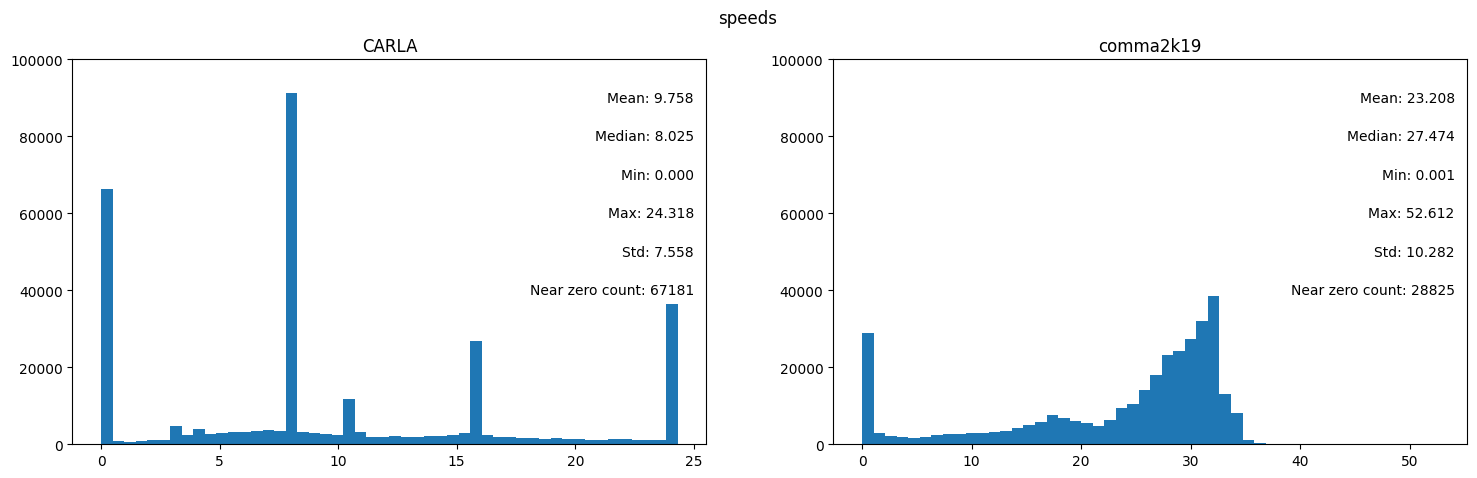

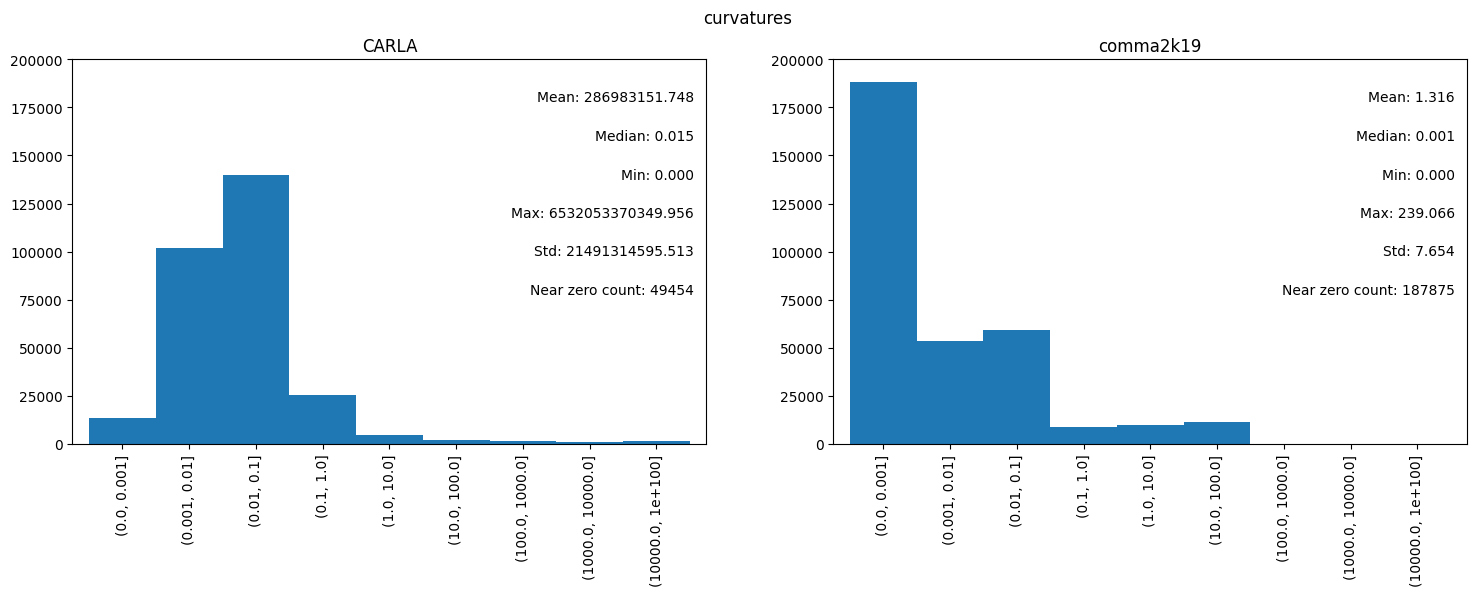

c:\Users\ugioh\code\carla_experiments\.venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:568: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)
c:\Users\ugioh\code\carla_experiments\.venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:568: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)


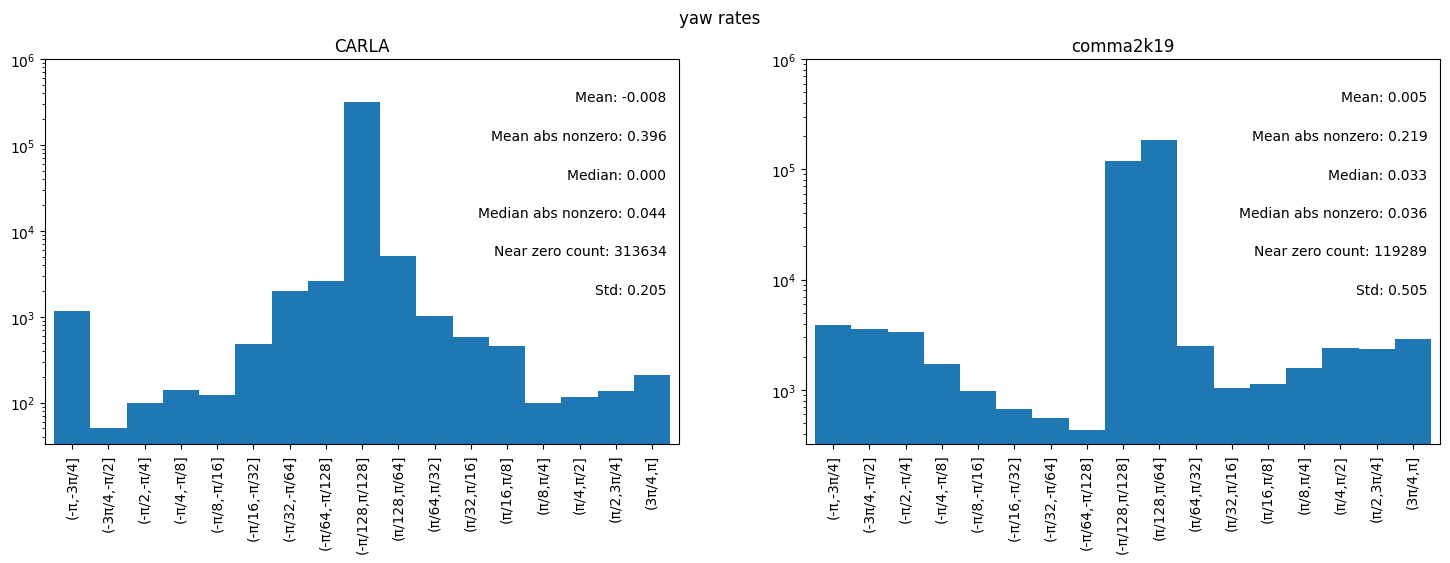

In [306]:
plot_stats(carla_stats, comma_stats)

speeds bins 50


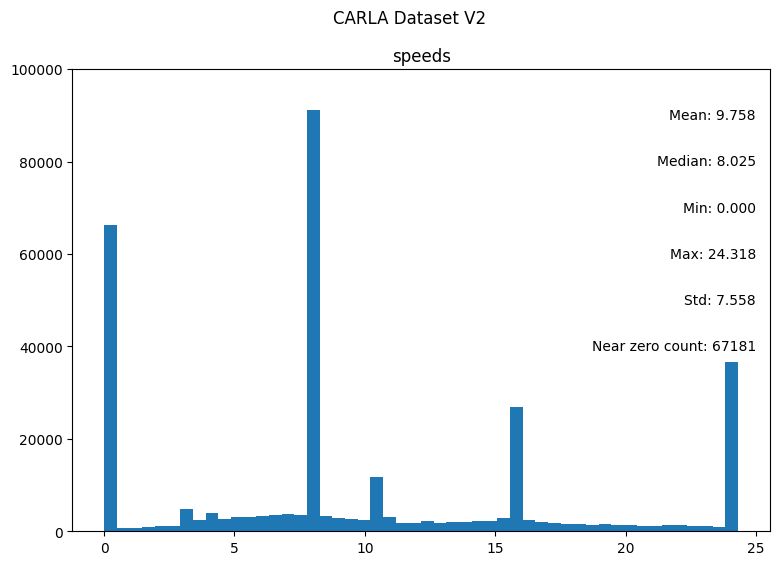

name speeds_carla_dataset_v2


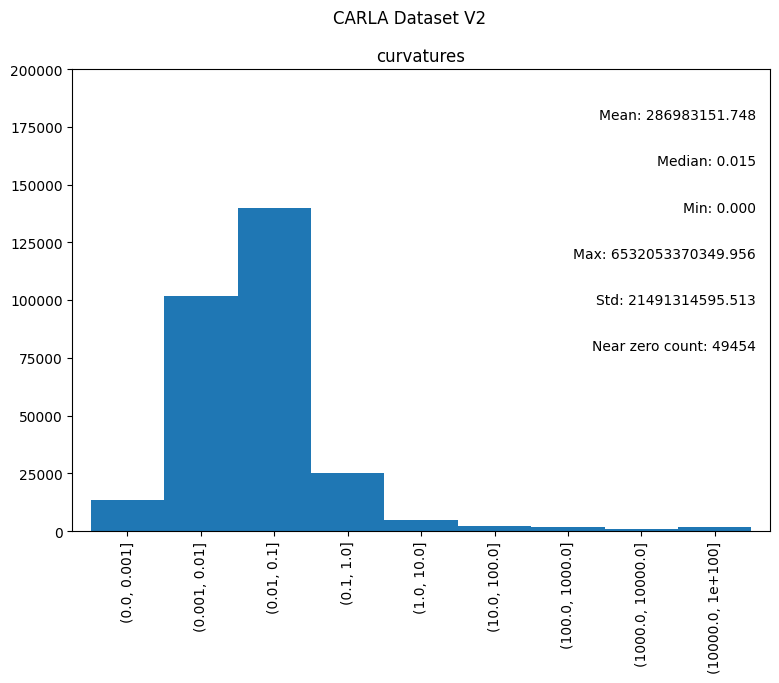

name curvatures_carla_dataset_v2


c:\Users\ugioh\code\carla_experiments\.venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:568: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)


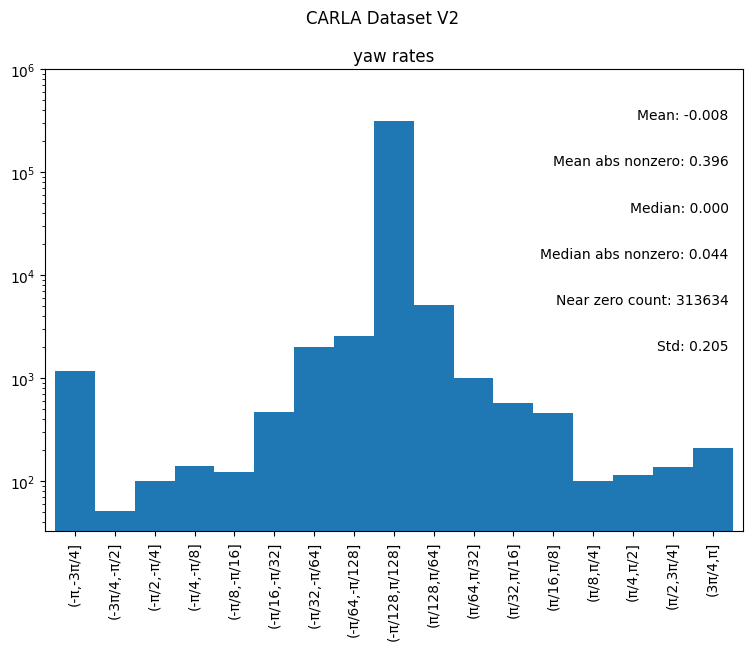

name yaw_rates_carla_dataset_v2


In [307]:

plot_stats_single(carla_stats, "CARLA Dataset V2")

speeds bins 50


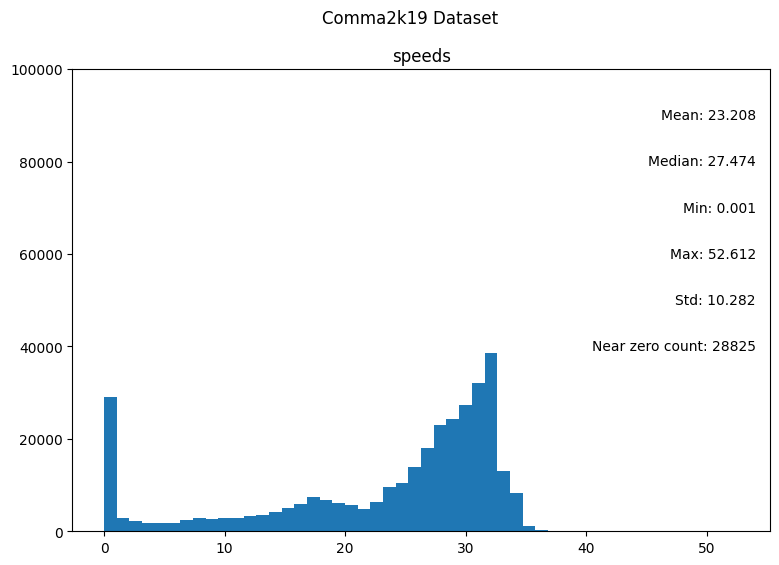

name speeds_comma2k19_dataset


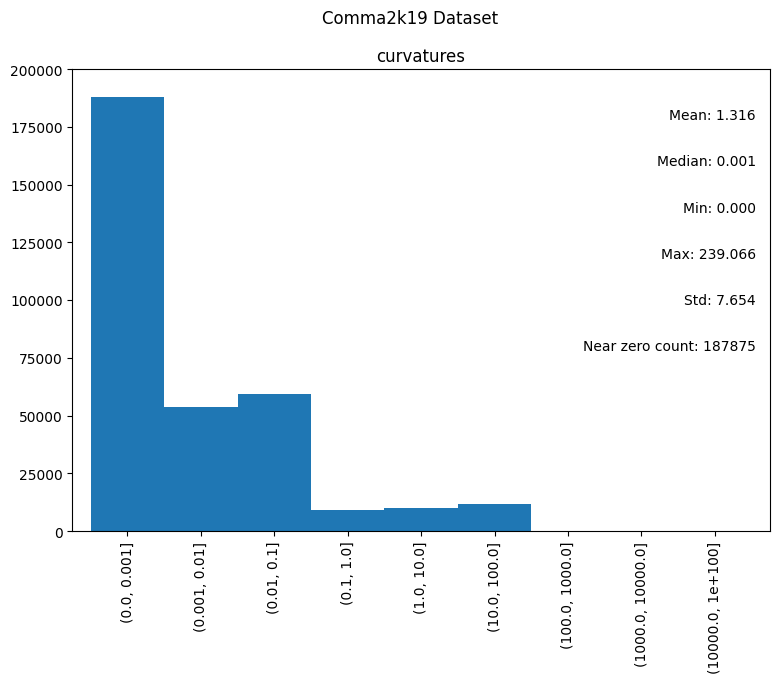

name curvatures_comma2k19_dataset


c:\Users\ugioh\code\carla_experiments\.venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:568: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)


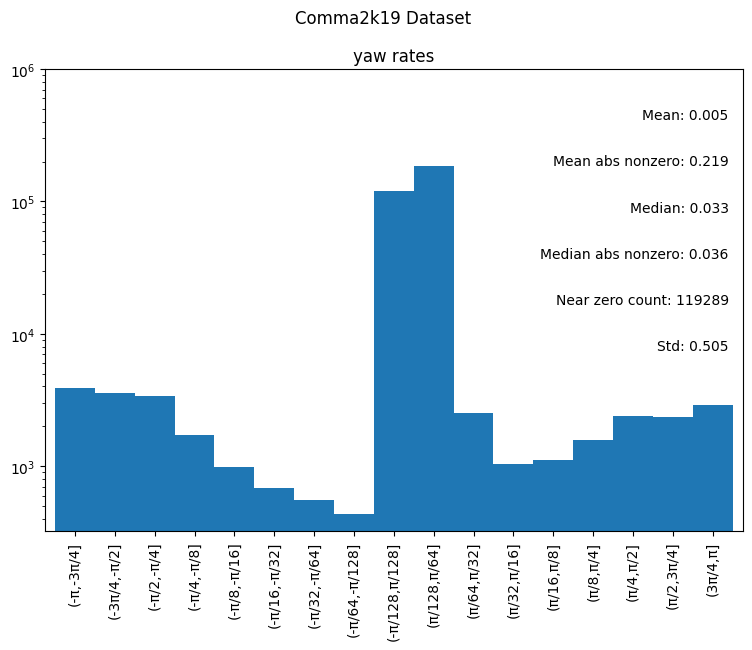

name yaw_rates_comma2k19_dataset


In [308]:

plot_stats_single(comma_stats, "Comma2k19 Dataset")

speeds bins 50


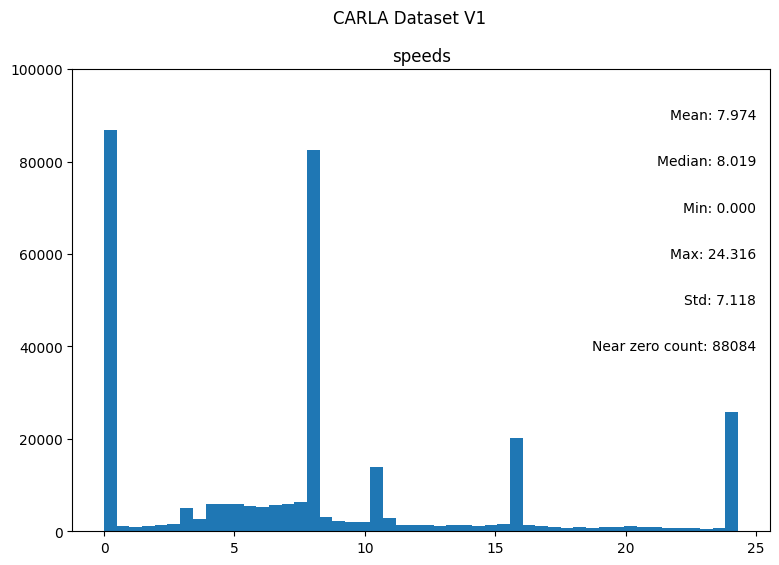

name speeds_carla_dataset_v1


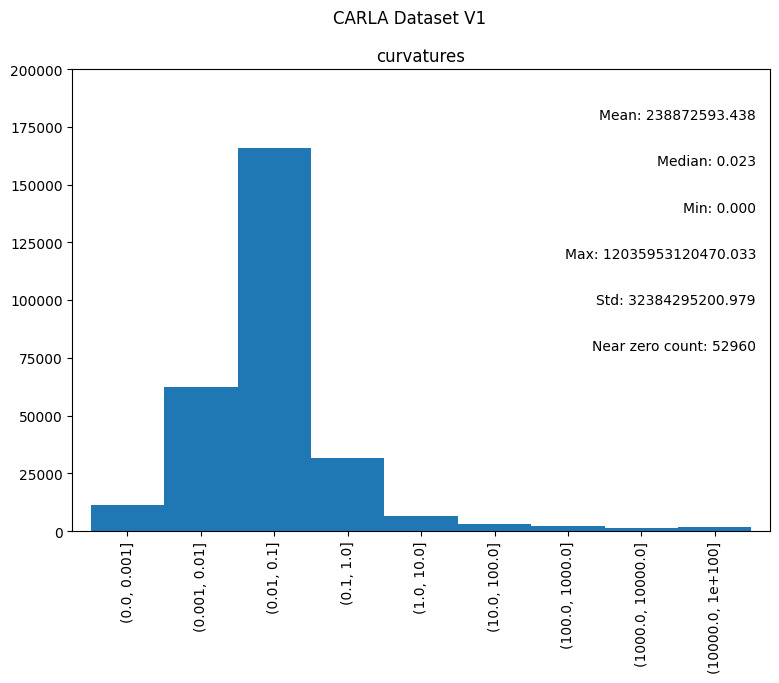

name curvatures_carla_dataset_v1


c:\Users\ugioh\code\carla_experiments\.venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:568: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)


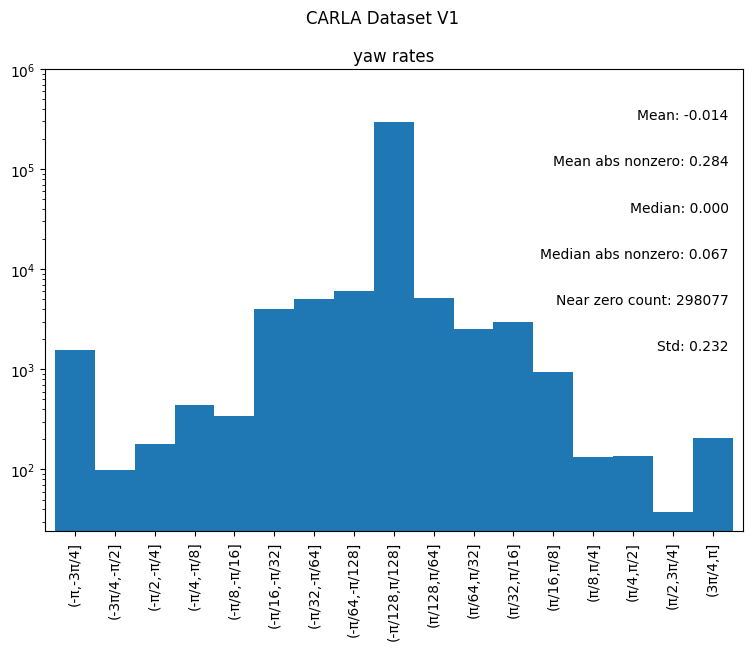

name yaw_rates_carla_dataset_v1


In [309]:
plot_stats_single(carla_statsv1, "CARLA Dataset V1")

In [317]:
curvature = np.array(comma_stats["curvatures"])
curvature[np.isinf(curvature)] = 0
yaws = np.abs(np.array(comma_stats["yaws"]))
np.corrcoef(curvature, yaws)

array([[1.        , 0.47448599],
       [0.47448599, 1.        ]])